# EDA focus transaction data

In [1]:
import requests
import urllib.parse as up
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

import constants_year_MT 
import importlib # to reload the constants module. Necessary if we do changes in module 

In [2]:
# import data from supermetrics 

importlib.reload(constants_year_MT)
from constants_year_MT import url_transaction_table 
response_transactions_all = requests.get(url_transaction_table)
print(response_transactions_all)

<Response [200]>


In [3]:
# function to create dataframe from url data 
def url_to_df (url, response): 
    """
    Function to create pandas dataframe from url data. Imported data needs 
    to be of type json or keyjson. Otherwise an exception error is thrown

    Arguments: 
        url: url previously imported from constants file 
        response: previously extracted response 

    Returns: 
        df2: supermetrics information transformed into pandas dataframe 
    """

    if 'data/json?' in url:
        # convert json into pandas df 
        data = json.loads(json.dumps(response.json()))
        df = pd.DataFrame.from_dict(data['data'])
        headers = df.iloc[0]
        df2 = pd.DataFrame(df.values[1:], columns=headers)
    elif 'data/keyjson?' in url:
        # convert json key-value pair output to pandas df 
        df2 = pd.read_json(json.dumps(response.json()))
    else:
        # throw exception message 
        import sys
        sys.exit("DEFINE JSON OR KEYJSON AS OUTPUT FORMAT: https://supermetrics.com/docs/product-api-output-formats/")
    return df2     
    
df_transactions_supermetrics = url_to_df(url_transaction_table, response_transactions_all)

In [4]:
df_transactions_supermetrics

,clientID,Date,Hour,Minute,Transaction ID,Channel group,Source,Device category,Operating system,Users,Transactions,Transaction revenue,Total time on site,Pageviews
0,39565.1609585172,2021-01-02,12,09,0167-6629043201,Referral,startpage.com,desktop,Windows,1,1,36.9756,0,0
1,780848.1638289758,2021-11-30,17,32,0208-6916086005,Email,newsletter,mobile,iOS,1,1,79.2334,0,0
2,909937.1636656983,2021-11-30,17,15,0175-6916076581,Email,newsletter,mobile,Android,1,1,21.1289,0,0
3,1197085.1609745532,2021-01-04,08,41,0131-6630646616,Generic Paid Search,google,desktop,Windows,1,1,15.8467,0,0
4,1269798.1636797845,2021-11-13,11,10,0108-6901169723,Organic Search,google,desktop,Windows,1,1,52.8223,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7656,2045311519.1608800768,2021-11-30,18,00,0183-6916102405,Email,newsletter,desktop,Windows,1,1,105.6445,0,0
7657,2045575823.1638269917,2021-11-30,12,03,0174-6915887459,Email,newsletter,desktop,Windows,1,1,36.9756,0,0
7658,2046764561.1638105875,2021-11-28,16,56,0181-6914337067,Organic Search,google,desktop,Macintosh,1,1,42.2578,0,0
7659,2047341159.1608793700,2021-12-28,11,38,0147-6940064592,Branded Paid Search,google,mobile,Android,1,1,79.2334,0,0


In [56]:
# import data from frnow 
# df_transactions_frnow = pd.read_csv(r'C:\Users\carol\OneDrive\Escritorio\FH Kufstein\MT\analysis\transaction_table.csv', sep = ";", encoding = "ISO-8859-1")
df_transactions_frnow = pd.read_csv(r'C:\Users\carol\OneDrive\Escritorio\FH Kufstein\MT\analysis\transaction_table_v2.csv', sep = ";", encoding = "ISO-8859-1")

In [58]:
df_transactions_frnow

,transaction_id,contact_number,reference_type,campaign_activity,lts,startdate_contact,gender,age
0,0101-6685997664,51844058,Contribution,2804 - Kontinent Afrika,300,09.03.2021,m,73.0
1,0101-6706128218,51121978,Contribution,1609907 - newsl_dig2021_03 freunde,165,02.04.2018,m,69.0
2,0101-6853958748,41061961,Contribution,277821 - EP 21 1 Haiti digital (20002),308,11.11.2013,w,75.0
3,0101-6914356363,51971430,Contribution,2810 - Spendenshop KDOE,40,28.11.2021,w,72.0
4,0101-6915940750,51834190,Contribution,1683504 - newsl_dig2021_12 nds,30,05.02.2021,w,86.0
...,...,...,...,...,...,...,...,...
9479,0298-6752871306,51656494,Activity,2808 - Kartenshop KDOE,685,19.11.2020,w,75.0
9480,0298-6752871306,51656494,Contribution,2810 - Spendenshop KDOE,685,19.11.2020,w,75.0
9481,0298-6825225041,37843802,Contribution,1649276 - newsl_dig2021_08 freunde,"32589,66",18.12.2009,w,55.0
9482,0298-6914263756,51685170,Contribution,233421 - Homepage Allgemein ab 21 Jugend unter...,200,05.12.2020,m,71.0


In [59]:
import warnings 
warnings.filterwarnings('ignore')

# transform class 
df_transactions_frnow['lts'] = pd.to_numeric(df_transactions_frnow['lts'], errors = 'coerce')
df_transactions_frnow['startdate_contact'] = pd.to_datetime(df_transactions_frnow['startdate_contact'], format = '%d.%m.%Y')

*NOTE*: features about region/city can be imported from Supermetrics

In [60]:
# join transactions from supermetric with transactions from FRnow using Transaction ID 
df_transactions_frnow.rename(columns = {'transaction_id':'Transaction ID'}, inplace = True)
df_merged_transactions = pd.merge(left = df_transactions_supermetrics, right = df_transactions_frnow, how = 'left', on = 'Transaction ID')
df_merged_transactions

,clientID,Date,Hour,Minute,Transaction ID,Channel group,Source,Device category,Operating system,Users,...,Transaction revenue,Total time on site,Pageviews,contact_number,reference_type,campaign_activity,lts,startdate_contact,gender,age
0,39565.1609585172,2021-01-02,12,09,0167-6629043201,Referral,startpage.com,desktop,Windows,1,...,36.9756,0,0,51789550.0,Contribution,2804 - Kontinent Afrika,50.0,2021-01-02,m,43.0
1,780848.1638289758,2021-11-30,17,32,0208-6916086005,Email,newsletter,mobile,iOS,1,...,79.2334,0,0,37144557.0,Contribution,1683525 - newsl_dig2021_12 cg Reminder,825.0,2008-03-11,w,66.0
2,909937.1636656983,2021-11-30,17,15,0175-6916076581,Email,newsletter,mobile,Android,1,...,21.1289,0,0,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,1197085.1609745532,2021-01-04,08,41,0131-6630646616,Generic Paid Search,google,desktop,Windows,1,...,15.8467,0,0,51794998.0,Contribution,2807 - Kontinent sterreich,15.0,2021-01-04,w,81.0
4,1269798.1636797845,2021-11-13,11,10,0108-6901169723,Organic Search,google,desktop,Windows,1,...,52.8223,0,0,46312492.0,Contribution,233421 - Homepage Allgemein ab 21 Jugend unter...,370.0,2014-12-19,m,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,2045311519.1608800768,2021-11-30,18,00,0183-6916102405,Email,newsletter,desktop,Windows,1,...,105.6445,0,0,50474998.0,Contribution,1683517 - newsl_dig2021_12 freunde Reminder,525.0,2015-12-29,m,67.0
7747,2045575823.1638269917,2021-11-30,12,03,0174-6915887459,Email,newsletter,desktop,Windows,1,...,36.9756,0,0,34969592.0,Contribution,1681457 - newsl_dig2021_12 freunde,255.0,2003-11-24,w,68.0
7748,2046764561.1638105875,2021-11-28,16,56,0181-6914337067,Organic Search,google,desktop,Macintosh,1,...,42.2578,0,0,51971448.0,Contribution,2810 - Spendenshop KDOE,40.0,2021-11-28,m,91.0
7749,2047341159.1608793700,2021-12-28,11,38,0147-6940064592,Branded Paid Search,google,mobile,Android,1,...,79.2334,0,0,39025861.0,Contribution,2801 - Kontinent Allgemein,125.0,2011-12-27,m,75.0


Still some rows without data, but 6.729 are now available - just 1.022 observations do not have an equivalent in the internal dataset. (?) I will need to figure out why. 

In [61]:
# filter rows with missing data 
df_notnull = df_merged_transactions[df_merged_transactions['contact_number'].notnull()]
len(df_notnull)

6729

In [64]:
df_merged_transactions['intern_extern_flag'] = np.where(pd.isnull(df_merged_transactions['contact_number']), 'just_extern', 'intern') 
df_merged_transactions['intern_extern_flag'].value_counts()

intern         6729
just_extern    1022
Name: intern_extern_flag, dtype: int64

In [67]:
y1 = df_merged_transactions[df_merged_transactions['intern_extern_flag'] == 'intern']['Channel group'].value_counts()
y2 = df_merged_transactions[df_merged_transactions['intern_extern_flag'] == 'just_extern']['Channel group'].value_counts()

Branded Paid Search    255
Organic Search         243
Email                  201
Direct                 168
Generic Paid Search     79
Referral                63
Display                  6
Social                   3
(Other)                  3
YouTube Ads              1
Name: Channel group, dtype: int64

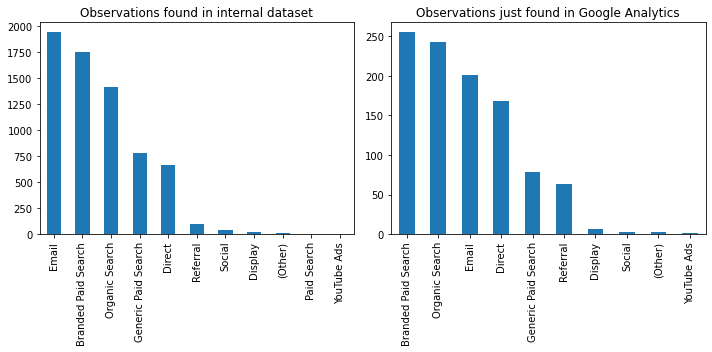

In [68]:
fig = plt.figure() 
fig.set_figheight(5)
fig.set_figwidth(10)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
y1.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.title('Observations found in internal dataset')
plt.subplot(1, 2, 2) # index 2
y2.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.title('Observations just found in Google Analytics')
# minimize overlap 
plt.tight_layout()
plt.show()


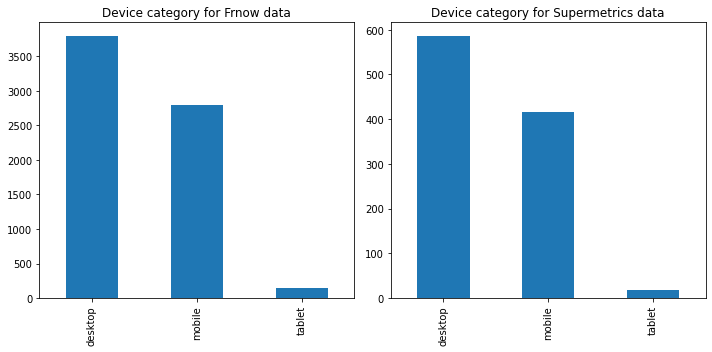

In [70]:
# print(df_transactions_supermetrics['Channel group'].value_counts())
fig = plt.figure() 
fig.set_figheight(5)
fig.set_figwidth(10)

plt.subplot(1, 2, 1) # row 1, col 2 index 1

df_merged_transactions[df_merged_transactions['intern_extern_flag'] == 'intern']['Device category'].value_counts().plot(kind = 'bar')
plt.title('Device category for Frnow data')

plt.subplot(1, 2, 2) # index 2
df_merged_transactions[df_merged_transactions['intern_extern_flag'] == 'just_extern']['Device category'].value_counts().plot(kind = 'bar')
plt.title('Device category for Supermetrics data')

# minimize overlap 
plt.tight_layout()
plt.show()

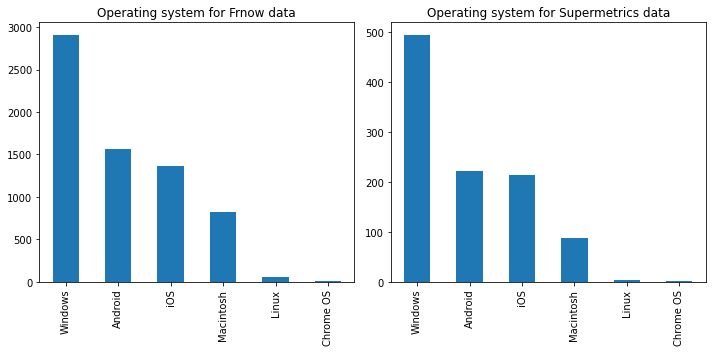

In [71]:
fig = plt.figure() 
fig.set_figheight(5)
fig.set_figwidth(10)

plt.subplot(1, 2, 1) # row 1, col 2 index 1

df_merged_transactions[df_merged_transactions['intern_extern_flag'] == 'intern']['Operating system'].value_counts().plot(kind = 'bar')
plt.title('Operating system for Frnow data')

plt.subplot(1, 2, 2) # index 2
df_merged_transactions[df_merged_transactions['intern_extern_flag'] == 'just_extern']['Operating system'].value_counts().plot(kind = 'bar')
plt.title('Operating system for Supermetrics data')

# minimize overlap 
plt.tight_layout()
plt.show()

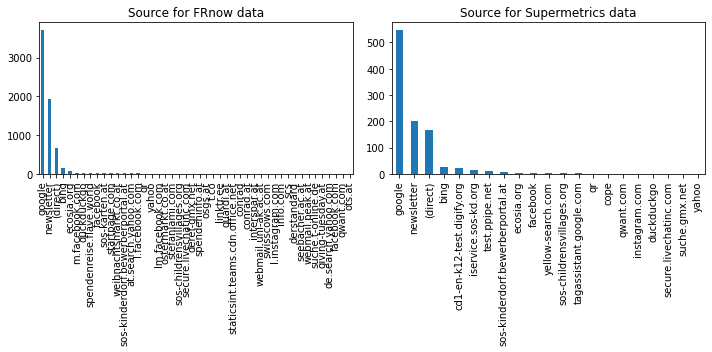

In [72]:
# print(df_transactions_supermetrics['Channel group'].value_counts())
fig = plt.figure() 
fig.set_figheight(5)
fig.set_figwidth(10)

plt.subplot(1, 2, 1) # row 1, col 2 index 1

df_merged_transactions[df_merged_transactions['intern_extern_flag'] == 'intern']['Source'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.title('Source for FRnow data')

plt.subplot(1, 2, 2) # index 2
df_merged_transactions[df_merged_transactions['intern_extern_flag'] == 'just_extern']['Source'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.title('Source for Supermetrics data')

# minimize overlap 
plt.tight_layout()
plt.show()